In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn import preprocessing
from math import ceil

plt.style.use('seaborn-whitegrid')

In [5]:
training_set = pd.read_csv("data/training_set_VU_DM.csv")
training_set["date_time"] = pd.to_datetime(training_set["date_time"])

In [6]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
srch_id                        int64
date_time                      datetime64[ns]
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       int64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday

In [7]:
def values_missing(df, path):
    missing_values = []
    for i in sorted(df.columns):
        ser = df[i]
        missing_percentage= 100 - ser.count() / len(ser) * 100
        missing_values.append({"var": i, "percentage missing": missing_percentage})

    df = pd.DataFrame(missing_values)
    ax = df.plot.bar(x="var", y="percentage missing", figsize=(20, 5))
    ax.figure.savefig(path, dpi=200, bbox_inches="tight")

    pass

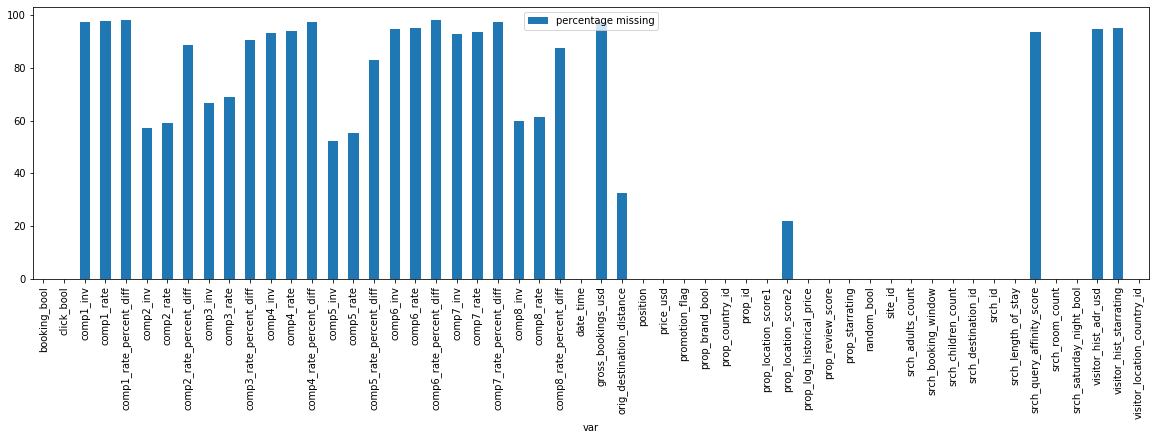

In [8]:
values_missing(training_set, path="EDA_outputs/missing_values.png")

In [9]:
def histograms(df, path):
    for i in df.columns:
        if i == "date_time" or i == "srch_id":
            continue
        try:
            print(i)
            series = df[i]
            plt.clf()
            plt.hist(series, bins=100)
            plt.title(f"{i}")
            plt.savefig(path + f"{i}.png", dpi=200)

        except:
            pass

site_id
visitor_location_country_id
visitor_hist_starrating


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


visitor_hist_adr_usd
prop_country_id
prop_id
prop_starrating
prop_review_score
prop_brand_bool
prop_location_score1
prop_location_score2
prop_log_historical_price
position
price_usd
promotion_flag
srch_destination_id
srch_length_of_stay
srch_booking_window
srch_adults_count
srch_children_count
srch_room_count
srch_saturday_night_bool
srch_query_affinity_score
orig_destination_distance
random_bool
comp1_rate
comp1_inv
comp1_rate_percent_diff
comp2_rate
comp2_inv
comp2_rate_percent_diff
comp3_rate
comp3_inv
comp3_rate_percent_diff
comp4_rate
comp4_inv
comp4_rate_percent_diff
comp5_rate
comp5_inv
comp5_rate_percent_diff
comp6_rate
comp6_inv
comp6_rate_percent_diff
comp7_rate
comp7_inv
comp7_rate_percent_diff
comp8_rate
comp8_inv
comp8_rate_percent_diff
click_bool
gross_bookings_usd
booking_bool


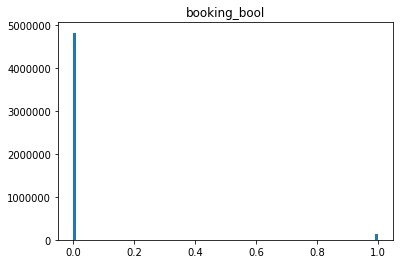

In [10]:
histograms(training_set, path="EDA_outputs/histograms/")

In [39]:
def histograms_all(df, path):
    attributes = df.columns 
    cols, rows = 5, ceil(len(attributes) / 5)
    fig, axs = plt.subplots(rows, cols, figsize=(60,60))
    axs = axs.ravel()
    
    for idx, i in enumerate(attributes):
        try:
            ser = df[i]
            axs[idx].hist(ser, bins=100)
            axs[idx].set_title(f"{i}")
        except:
            pass
    fig.savefig(path, dpi=150, transparent=False)

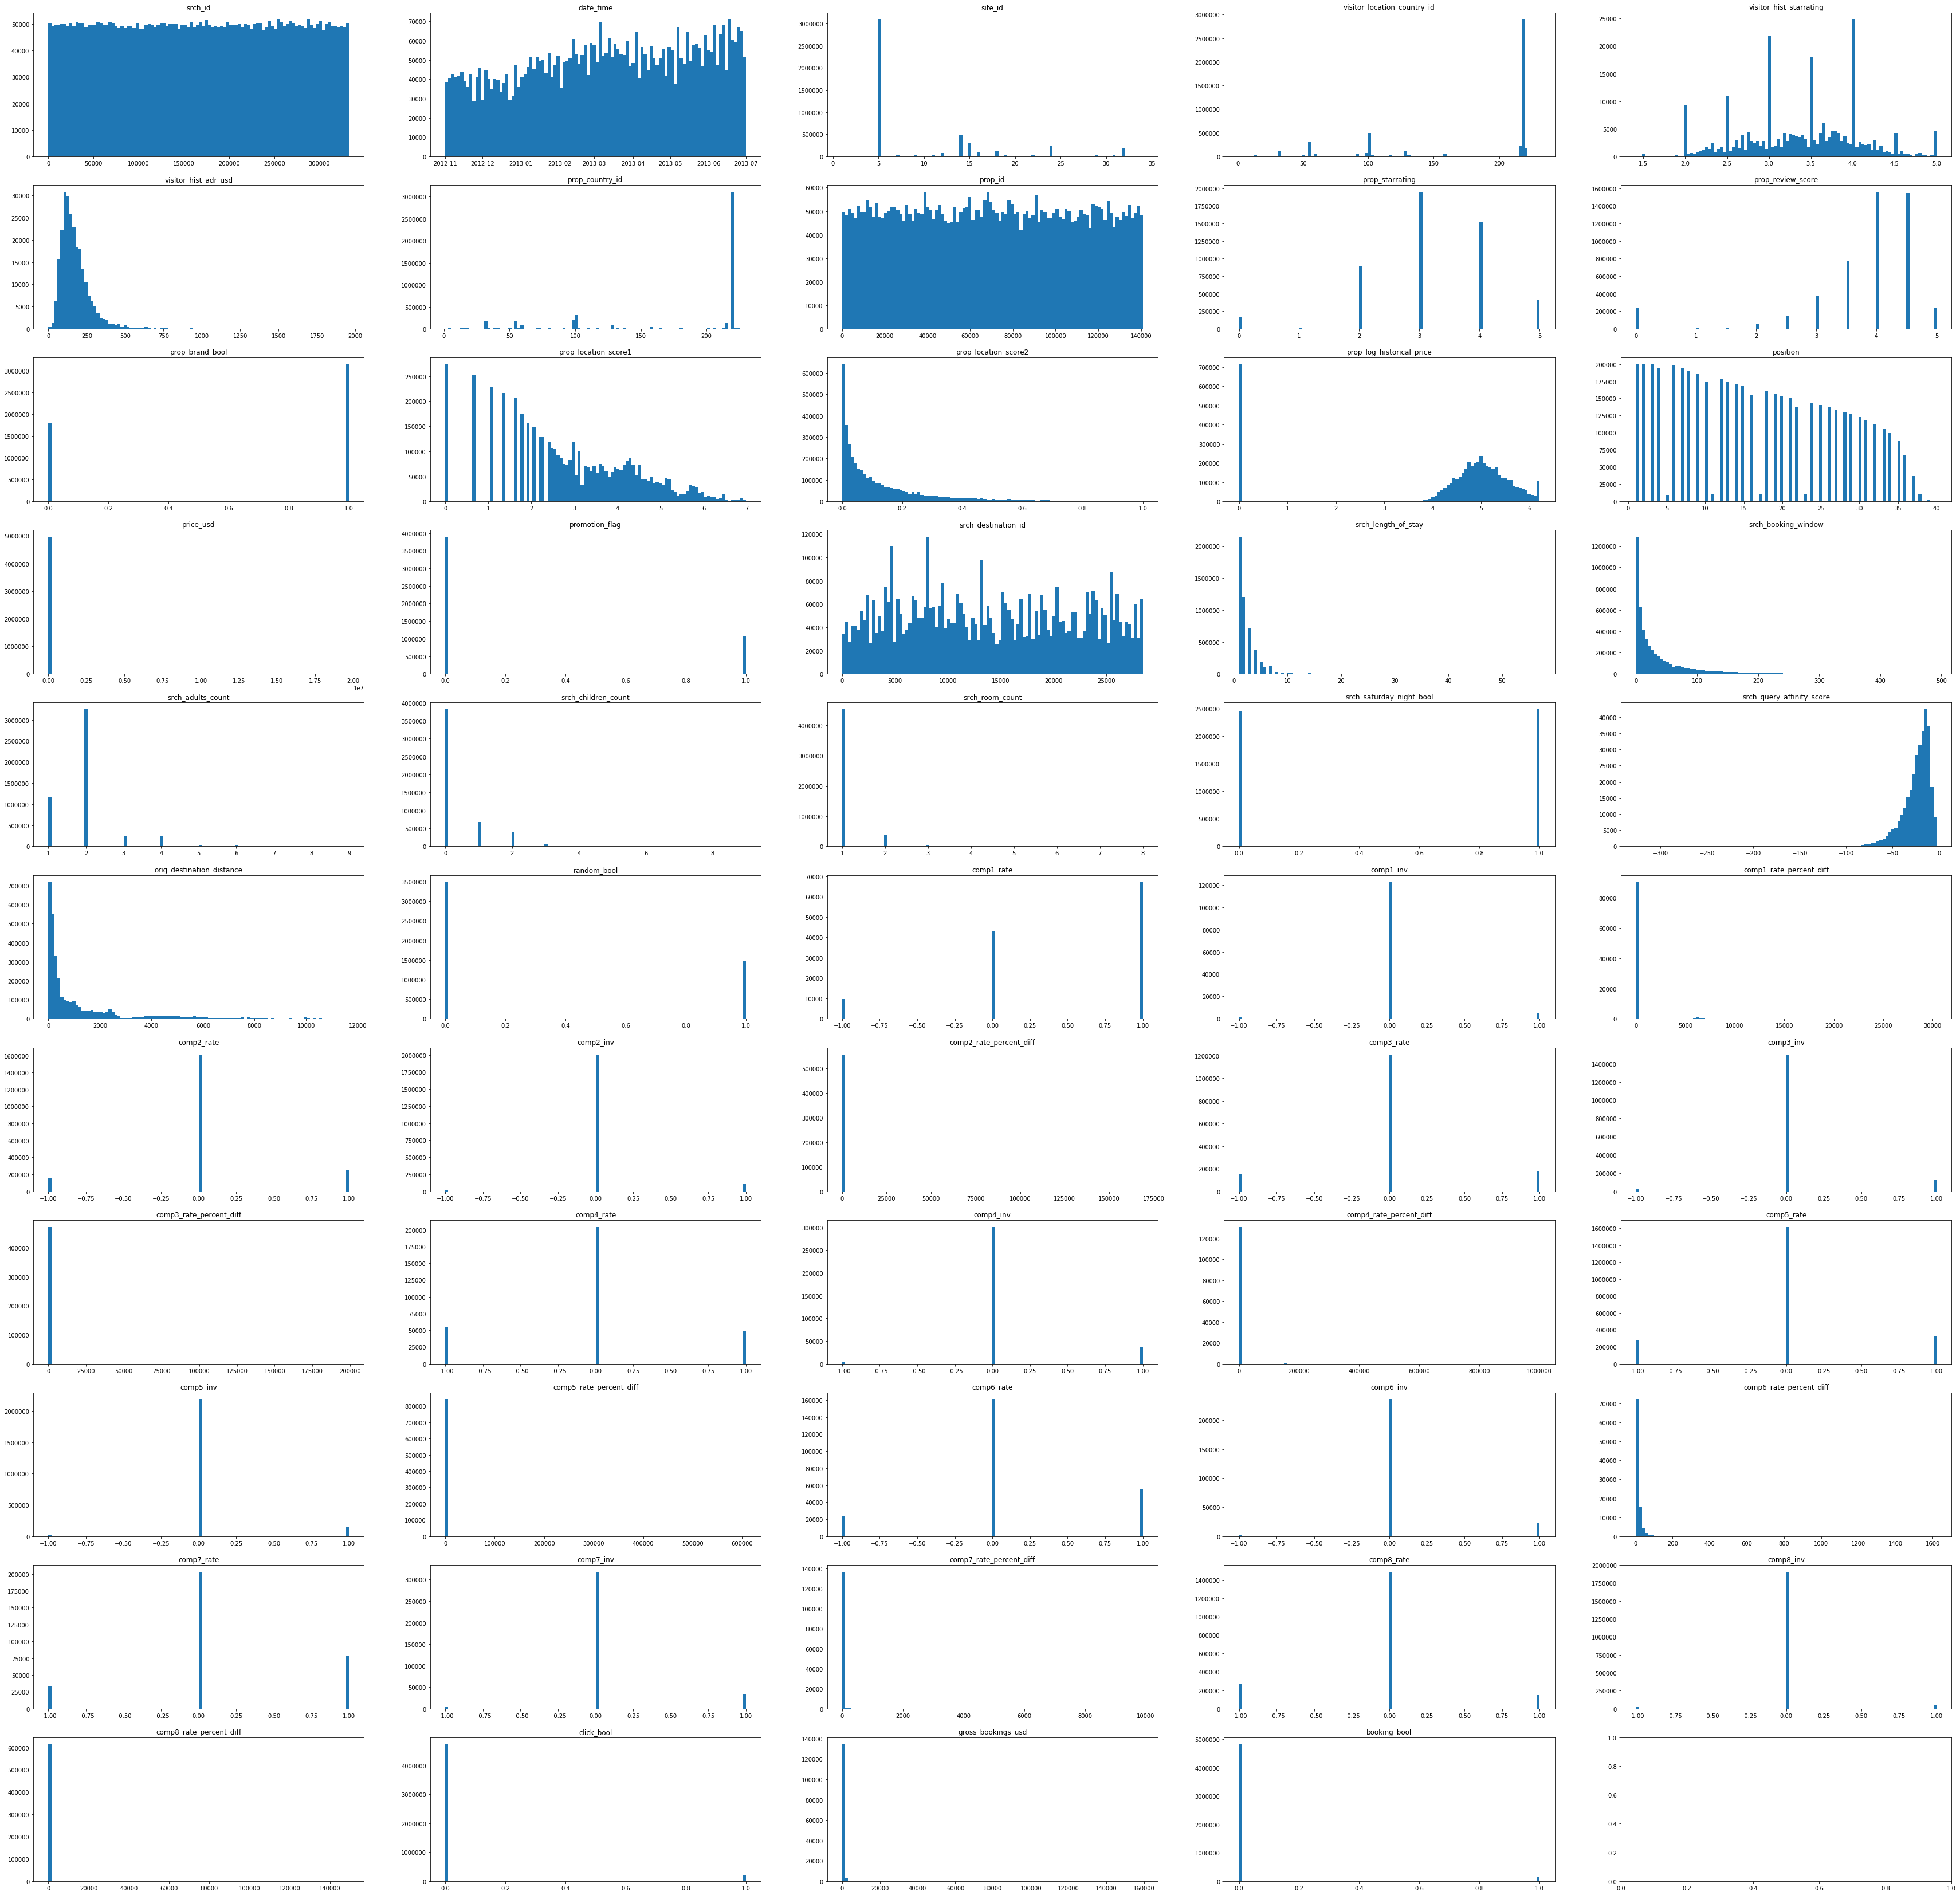

In [40]:
histograms_all(training_set, "EDA_outputs/Histograms_all.png")

In [43]:
training_summary = training_set.describe().transpose()
training_summary

,count,mean,std,min,25%,50%,75%,max
srch_id,4958347.0,166366.561096,96112.230102,1.0000,82936.000000,166507.0000,249724.000000,3.327850e+05
site_id,4958347.0,9.953133,7.646890,1.0000,5.000000,5.0000,14.000000,3.400000e+01
visitor_location_country_id,4958347.0,175.340453,65.916249,1.0000,100.000000,219.0000,219.000000,2.310000e+02
visitor_hist_starrating,251866.0,3.374334,0.692519,1.4100,2.920000,3.4500,3.930000,5.000000e+00
visitor_hist_adr_usd,252988.0,176.022659,107.254493,0.0000,109.810000,152.2400,213.490000,1.958700e+03
prop_country_id,4958347.0,173.973897,68.345248,1.0000,100.000000,219.0000,219.000000,2.300000e+02
prop_id,4958347.0,70079.179496,40609.920378,1.0000,35010.000000,69638.0000,105168.000000,1.408210e+05
prop_starrating,4958347.0,3.180525,1.051024,0.0000,3.000000,3.0000,4.000000,5.000000e+00
prop_review_score,4950983.0,3.777777,1.050329,0.0000,3.500000,4.0000,4.500000,5.000000e+00
prop_brand_bool,4958347.0,0.634699,0.481514,0.0000,0.000000,1.0000,1.000000,1.000000e+00


In [47]:
print(f'Number of data points: {len(training_set)}')

print(f'Numer of searches: {len(training_set.srch_id.unique())}')

Number of data points: 4958347
Numer of searches: 199795
